In [2]:
import cv2
import tkinter as tk

# Function to get screen resolution
def get_screen_resolution():
    root = tk.Tk()
    width = root.winfo_screenwidth()
    height = root.winfo_screenheight()
    root.destroy()
    return width, height

# Load pre-trained HOG detector for pedestrian detection
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Read image file
image_path = 'people walking.jpeg'
frame = cv2.imread(image_path)

# Get screen resolution
screen_width, screen_height = get_screen_resolution()

# Calculate dimensions for half of the screen
target_width = screen_width // 2
target_height = screen_height // 2

# Resize image to half of the screen dimensions
frame = cv2.resize(frame, (target_width, target_height))

# Convert frame to grayscale for pedestrian detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect pedestrians using HOG
pedestrians, _ = hog.detectMultiScale(gray, winStride=(8, 8), padding=(16, 16), scale=1.05)

# Draw bounding boxes around detected pedestrians
for (x, y, w, h) in pedestrians:
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the frame with bounding boxes
cv2.imshow('Pedestrian Detection', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Display total count of people detected
num_people = len(pedestrians)
print("Total number of people detected:", num_people)


Total number of people detected: 4


Using cache found in C:\Users\kingy/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-3 Python-3.11.5 torch-2.3.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


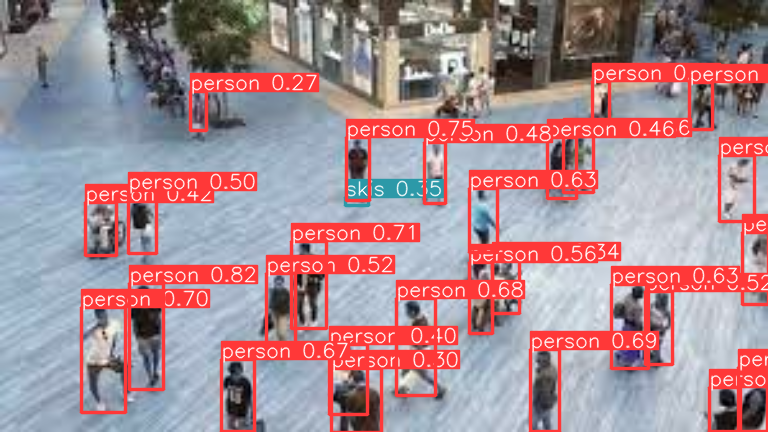

Total number of pedestrians detected: 28


In [1]:
import cv2
import torch
import tkinter as tk
from pathlib import Path

# Function to get screen resolution
def get_screen_resolution():
    root = tk.Tk()
    width = root.winfo_screenwidth()
    height = root.winfo_screenheight()
    root.destroy()
    return width, height

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Read image file
image_path = 'people walking.jpeg'
frame = cv2.imread(image_path)

# Get screen resolution
screen_width, screen_height = get_screen_resolution()

# Calculate dimensions for half of the screen
target_width = screen_width // 2
target_height = screen_height // 2

# Resize frame to half of the screen dimensions
frame = cv2.resize(frame, (target_width, target_height))

# Perform pedestrian detection using YOLOv5
results = model(frame)

# Display the results (image with bounding boxes)
results.show()

# Count the number of detected pedestrians
num_people = len(results.pred[0])

# Display total count of pedestrians detected
print("Total number of pedestrians detected:", num_people)
